In [1]:
# Import libraries and load the experimental settings.

import hypergraph, hyperneo, comm_vis
settings = comm_vis.read_settings()

In [2]:
# This json object named 'settings' stores the order of node labels, the set of node label names, 
# the order of inferred communities, and the hyperparameter set for each empirical hypergraph in addition to the random seed.

import json
print(json.dumps(settings, indent=2))

{
  "random_state": 42,
  "workplace": {
    "label_name": [
      "DISQ",
      "DMCT",
      "DSE",
      "SFLE",
      "SRH"
    ],
    "label_order": [
      0,
      1,
      2,
      3,
      4
    ],
    "community_order": [
      0,
      4,
      1,
      2,
      3
    ],
    "hyperparam": [
      5,
      0.9
    ]
  },
  "hospital": {
    "label_name": [
      "ADM",
      "MED",
      "NUR",
      "PAT"
    ],
    "label_order": [
      0,
      1,
      2,
      3
    ],
    "community_order": [
      1,
      0
    ],
    "hyperparam": [
      2,
      0.4
    ]
  },
  "contact-high-school": {
    "label_name": [
      "2BIO1",
      "2BIO2",
      "2BIO3",
      "MP*1",
      "MP*2",
      "PSI*",
      "PC",
      "PC*",
      "MP"
    ],
    "label_order": [
      0,
      1,
      2,
      8,
      3,
      4,
      6,
      7,
      5
    ],
    "community_order": [
      5,
      4,
      1,
      6,
      3,
      8,
      2,
      0,
      7
    ],
    "hyperpara

In [3]:
# Load a data set. 
# You can specify "workplace", "hospital", "high-school", or "primary-school" as data_name. 
# In this example, specify the workplace data set.

data_name = "workplace"
#data_name = "hospital"
#data_name = "contact-high-school"
#data_name = "contact-primary-school"

G = hypergraph.read_empirical_hypergraph_data(data_name, print_info=True)

Number of nodes: 92
Number of hyperedges: 788
Average degree of the node: 17.652173913043477
Average size of the hyperedge: 2.0609137055837565
Maximum size of the hyperedge: 4
Number of different node lables: 5



In [4]:
# Set the random seed and the hyperparameters.

random_state = settings["random_state"]
(K, gamma) = settings[data_name]["hyperparam"]

In [5]:
# Fit the latent parameters of HyperNEO to the data.

model = hyperneo.HyperNEO(G, K, gamma, random_state=random_state)
best_loglik, (U, W, Beta) = model.fit()

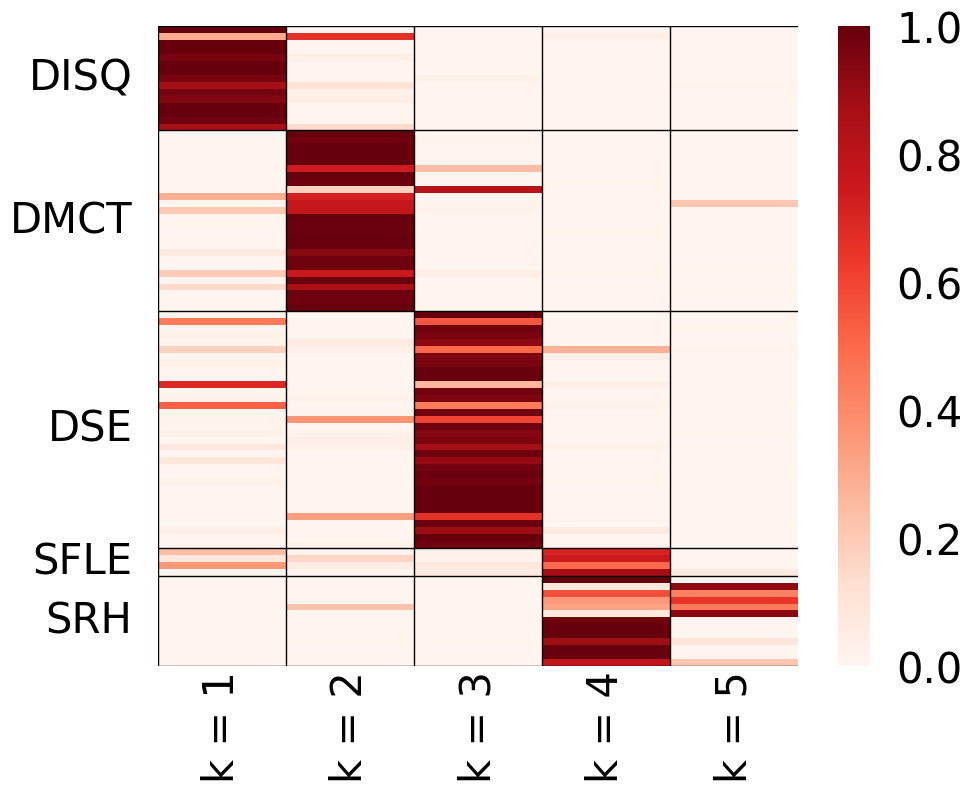

In [6]:
# Visualize inferred membership matrix.

comm_vis.inferred_membership_matrix(G, data_name, settings, U, W)

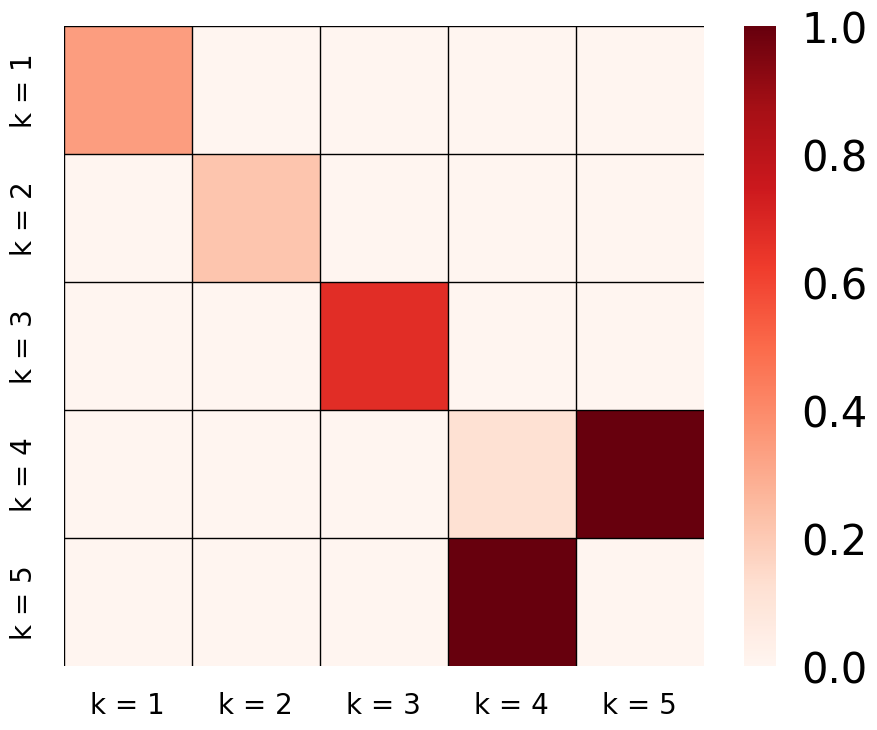

In [7]:
# Visualize inferred affinity matrix.

comm_vis.inferred_affinity_matrix(G, data_name, settings, U, W)

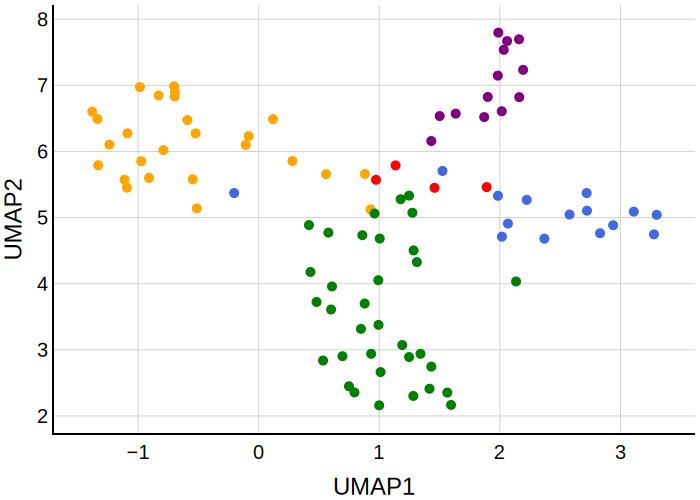

In [8]:
# Map the nodes in the hypergraph into a two-dimensional vector space using the inferred membership and affinity matrices.
# We use the Euclidean distance in the UMAP.

comm_vis.node_layout(G, data_name, settings, U, W, metric="euclidean")

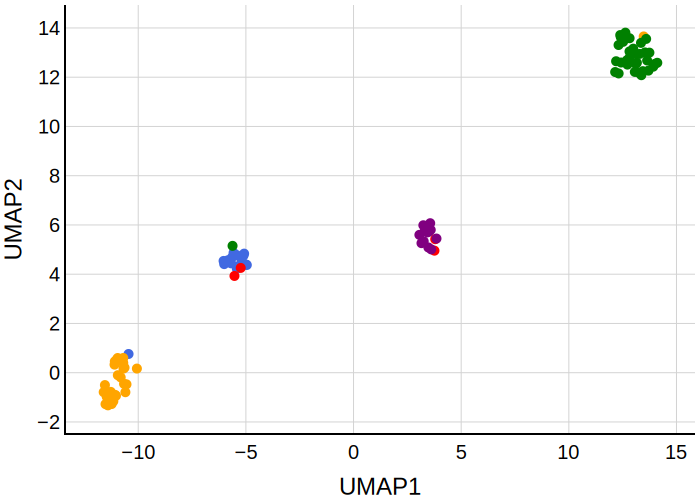

In [9]:
# Map the nodes in the hypergraph into a two-dimensional vector space using the inferred membership and affinity matrices.
# We use the cosine distance in the UMAP.

comm_vis.node_layout(G, data_name, settings, U, W, metric="cosine")